<a href="https://colab.research.google.com/github/leobi123/mda/blob/main/Unsupervised_EFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: Upload and load the data
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()

# Read the uploaded file into a DataFrame
df = pd.read_csv(io.BytesIO(uploaded['data_new_with_quality_scores.csv']))

print("Data shape:", df.shape)
df.head()


Saving data_new_with_quality_scores.csv to data_new_with_quality_scores.csv
Data shape: (14731, 23)


,projectID,status,startDate,endDate,totalCost,ecMaxContribution,OQI_month_norm,country,region,region_code,...,sub_fund_code,organizationCount,countryCount,europeanCountryCount,countryDiversityIndex,europeanOrganizationRatio,geoCentralizationIndex(KM),crossSectorCollaborationIndex,fundingEqualityIndex,quality_score_scaled
0,101116741,SIGNED,2024-02-01,2029-01-31,1499998,1499998,0.000000,NL,Western Europe,1,...,1,1,1,1,0.0000,1.00,0.00,0.0000,1.0000,0.000000
1,101162875,SIGNED,2025-03-01,2030-02-28,1500000,1500000,0.000000,IT,Southern Europe,3,...,1,2,2,2,0.6931,1.00,708.10,0.0000,0.5333,0.000000
2,101167314,SIGNED,2025-04-01,2031-03-31,11982258,11982258,0.000000,IT,Southern Europe,3,...,1,4,4,3,1.3863,0.75,2646.68,0.5623,0.9696,0.000000
3,101072693,SIGNED,2022-08-01,2024-07-31,100000,100000,0.021259,UA,Eastern Europe,4,...,4,1,1,0,0.0000,0.00,0.00,0.0000,1.0000,0.270017
4,101172406,SIGNED,2024-07-01,2025-12-31,608440,300000,0.000000,PL,Eastern Europe,4,...,4,1,1,1,0.0000,1.00,0.00,0.0000,1.0000,0.000000


In [ ]:
# Cell 2: Preprocess numeric metadata for EFA

import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer, StandardScaler

# 1. Select only the numeric metadata columns
numeric_vars = [
    'totalCost',
    'ecMaxContribution',
    'europeanOrganizationRatio',
    'geoCentralizationIndex(KM)',
    'organizationCount',
    'countryCount'
]
df_numeric = df[numeric_vars].copy()

# 2. Apply log1p transform to the cost variables
log_tf = FunctionTransformer(np.log1p, validate=True)
df_numeric[['totalCost', 'ecMaxContribution']] = log_tf.transform(
    df_numeric[['totalCost', 'ecMaxContribution']]
)

# 3. Standardize all numeric features
scaler = StandardScaler()
df_numeric = pd.DataFrame(
    scaler.fit_transform(df_numeric),
    columns=numeric_vars
)

# 4. Verify
print("Prepared numeric matrix for EFA:", df_numeric.shape)
df_numeric.head()


Prepared numeric matrix for EFA: (14731, 6)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,totalCost,ecMaxContribution,europeanOrganizationRatio,geoCentralizationIndex(KM),organizationCount,countryCount
0,0.545216,-0.753421,0.324986,-0.645429,-0.616784,-0.710574
1,0.545216,-0.753420,0.324986,0.025634,-0.507904,-0.456694
2,0.792089,0.139211,-1.003592,1.862819,-0.290143,0.051066
3,0.223486,-1.916715,-4.989325,-0.645429,-0.616784,-0.710574
4,0.438015,-1.444787,0.324986,-0.645429,-0.616784,-0.710574


Eigenvalues (sorted):
Factor 1: 2.662
Factor 2: 1.369
Factor 3: 0.815
Factor 4: 0.616
Factor 5: 0.427
Factor 6: 0.110

Number of factors with eigenvalue > 1: 2


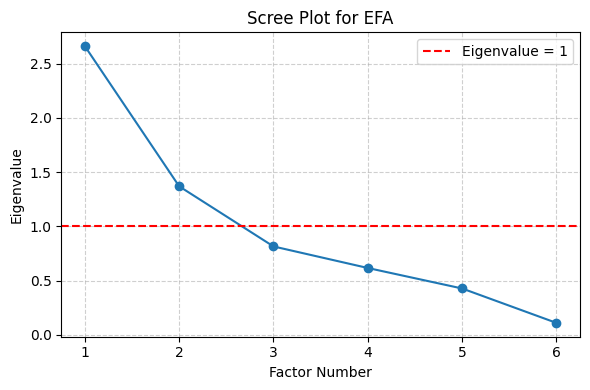

In [ ]:
# Cell 3: Determine number of factors

import numpy as np
import matplotlib.pyplot as plt

# 1. Compute correlation matrix of the preprocessed numeric data
corr_matrix = df_numeric.corr()

# 2. Compute eigenvalues of the correlation matrix
eigenvalues, _ = np.linalg.eig(corr_matrix)
eigenvalues_sorted = np.sort(eigenvalues)[::-1]

# 3. Print eigenvalues and count how many > 1 (Kaiser criterion)
print("Eigenvalues (sorted):")
for i, val in enumerate(eigenvalues_sorted, start=1):
    print(f"Factor {i}: {val:.3f}")
print(f"\nNumber of factors with eigenvalue > 1: {(eigenvalues_sorted > 1).sum()}")

# 4. Scree plot
plt.figure(figsize=(6,4))
plt.plot(range(1, len(eigenvalues_sorted) + 1), eigenvalues_sorted, marker='o')
plt.axhline(1, color='red', linestyle='--', label='Eigenvalue = 1')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot for EFA')
plt.xticks(range(1, len(eigenvalues_sorted) + 1))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# Cell 4: Install EFA tools

# Install factor_analyzer for exploratory factor analysis with rotation
!pip install factor_analyzer

from factor_analyzer import FactorAnalyzer



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=845942a9d07183d534d01ca5fcee6435aec639e62b85177eafaaec6dd4aa7673
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer
factor_analyzer installed and ready to use


In [ ]:
# Cell 5: Fit a two-factor model using sklearn’s FactorAnalysis

from sklearn.decomposition import FactorAnalysis

# 1. Instantiate and fit the FactorAnalysis model
fa = FactorAnalysis(n_components=2, random_state=42)
X_factors = fa.fit_transform(df_numeric)

# 2. Extract the factor loadings (shape: n_features × n_factors)
loadings = pd.DataFrame(
    fa.components_.T,
    index=df_numeric.columns,
    columns=['Factor1', 'Factor2']
)
print("Unrotated Factor Loadings:\n", loadings)

# 3. Compute communalities (sum of squared loadings for each variable)
communalities = pd.DataFrame(
    (loadings**2).sum(axis=1),
    columns=['Communality']
).round(3)
print("\nCommunalities:\n", communalities)


Unrotated Factor Loadings:
                              Factor1   Factor2
totalCost                   0.220125 -0.303998
ecMaxContribution           0.453270 -0.254184
europeanOrganizationRatio  -0.250744 -0.423646
geoCentralizationIndex(KM)  0.832834  0.509680
organizationCount           0.736750 -0.536419
countryCount                0.839176 -0.484558

Communalities:
                             Communality
totalCost                         0.141
ecMaxContribution                 0.270
europeanOrganizationRatio         0.242
geoCentralizationIndex(KM)        0.953
organizationCount                 0.831
countryCount                      0.939


In [ ]:
# Cell 6: Re-fit FactorAnalysis and apply Varimax rotation

from sklearn.decomposition import FactorAnalysis
import numpy as np
import pandas as pd

# 1. Re-fit the unrotated FactorAnalysis model
fa = FactorAnalysis(n_components=2, random_state=42)
fa.fit(df_numeric)   # df_numeric from Cell 2

# 2. Extract the unrotated loadings matrix (features × factors)
L = fa.components_.T

# 3. Define a Varimax rotation function
def varimax(Phi, gamma=1.0, q=20, tol=1e-6):
    p, k = Phi.shape
    R = np.eye(k)
    d = 0
    for _ in range(q):
        Lambda = Phi @ R
        u, s, vh = np.linalg.svd(
            Phi.T @ (Lambda**3 - (gamma/p) * Lambda @ np.diag(np.diag(Lambda.T @ Lambda)))
        )
        R = u @ vh
        d_new = s.sum()
        if d != 0 and d_new/d < 1 + tol:
            break
        d = d_new
    return Phi @ R

# 4. Rotate the loadings
L_rot = varimax(L)

# 5. Display the rotated loadings
rotated_loadings = pd.DataFrame(
    L_rot,
    index=df_numeric.columns,
    columns=['Factor1_rot', 'Factor2_rot']
)
print("Rotated Factor Loadings:")
print(rotated_loadings.round(3))


Rotated Factor Loadings:
                            Factor1_rot  Factor2_rot
totalCost                         0.369       -0.070
ecMaxContribution                 0.504        0.127
europeanOrganizationRatio         0.109       -0.480
geoCentralizationIndex(KM)        0.255        0.943
organizationCount                 0.904        0.117
countryCount                      0.943        0.225


In [ ]:
# Cell 8: Re-fit regression and print all metrics correctly

from sklearn.linear_model import LinearRegression

# 1. Prepare data
X = df[['Factor1_score', 'Factor2_score']]
y = df['OQI_month_norm']

# 2. Fit regression
lr = LinearRegression().fit(X, y)

# 3. Compute correlations
corr1 = df['Factor1_score'].corr(y)
corr2 = df['Factor2_score'].corr(y)

# 4. Compute R²
r2 = lr.score(X, y)

# 5. Print results
print(f"Correlation Factor1 vs OQI_month_norm: {corr1:.3f}")
print(f"Correlation Factor2 vs OQI_month_norm: {corr2:.3f}")
print(f"Regression coefficients [Factor1, Factor2]: {lr.coef_[0]:.6f}, {lr.coef_[1]:.6f}")
print(f"Intercept: {lr.intercept_:.6f}")
print(f"R² on full data: {r2:.3f}")


Correlation Factor1 vs OQI_month_norm: 0.336
Correlation Factor2 vs OQI_month_norm: 0.169
Regression coefficients [Factor1, Factor2]: 0.002632, -0.000341
Intercept: 0.007881
R² on full data: 0.113


In [ ]:
# Cell 7: Assess factorability via Bartlett’s Test & KMO

import numpy as np
import pandas as pd
from scipy.stats import chi2


# 1. Correlation matrix
R = df_numeric.corr().values
n, p = df_numeric.shape

# 2. Bartlett’s test of sphericity
detR = np.linalg.det(R)
df_bartlett = p * (p - 1) / 2
chi2_stat = -(n - 1 - (2*p + 5)/6) * np.log(detR)
p_value = 1 - chi2.cdf(chi2_stat, df_bartlett)
print(f"Bartlett’s test: χ² = {chi2_stat:.2f}, df = {int(df_bartlett)}, p = {p_value:.3e}")

# 3. KMO measure
invR = np.linalg.inv(R)
diag = np.sqrt(np.diag(invR))
partial_corr = -invR / np.outer(diag, diag)
np.fill_diagonal(partial_corr, 0)

corr_sq = R**2 - np.eye(p)
part_corr_sq = partial_corr**2

kmo_overall = corr_sq.sum() / (corr_sq.sum() + part_corr_sq.sum())
kmo_per_var = pd.Series(
    corr_sq.sum(axis=0) / (corr_sq.sum(axis=0) + part_corr_sq.sum(axis=0)),
    index=df_numeric.columns
).round(3)

print(f"KMO overall: {kmo_overall:.3f}")
print("KMO per variable:")
print(kmo_per_var)


Bartlett’s test: χ² = 36100.19, df = 15, p = 0.000e+00
KMO overall: 0.643
KMO per variable:
totalCost                     0.802
ecMaxContribution             0.894
europeanOrganizationRatio     0.430
geoCentralizationIndex(KM)    0.586
organizationCount             0.635
countryCount                  0.613
dtype: float64


In [ ]:
# Cell 8: Re-run EFA without 'europeanOrganizationRatio' and apply Varimax rotation

import numpy as np
import pandas as pd
from sklearn.decomposition import FactorAnalysis

# 1. Create a new numeric DataFrame excluding the low-KMO variable
df_num2 = df_numeric.drop(columns=['europeanOrganizationRatio'])

# 2. Fit a two-factor model on the reduced set
fa2 = FactorAnalysis(n_components=2, random_state=42)
fa2.fit(df_num2)

# 3. Extract the unrotated loading matrix (features × factors)
L2 = fa2.components_.T

# 4. Define a Varimax rotation function
def varimax(Phi, gamma=1.0, q=20, tol=1e-6):
    p, k = Phi.shape
    R = np.eye(k)
    d = 0
    for _ in range(q):
        Lambda = Phi @ R
        u, s, vh = np.linalg.svd(
            Phi.T @ (Lambda**3 - (gamma/p) * Lambda @ np.diag(np.diag(Lambda.T @ Lambda)))
        )
        R = u @ vh
        d_new = s.sum()
        if d != 0 and d_new/d < 1 + tol:
            break
        d = d_new
    return Phi @ R

# 5. Rotate the loadings
L2_rot = varimax(L2)

# 6. Build and display the rotated loadings DataFrame
rotated_loadings2 = pd.DataFrame(
    L2_rot,
    index=df_num2.columns,
    columns=['Factor1_rot','Factor2_rot']
)
print("Rotated Factor Loadings (without europeanOrganizationRatio):")
print(rotated_loadings2.round(3))

# 7. Compute and print communalities
comm2 = pd.DataFrame(
    (rotated_loadings2**2).sum(axis=1),
    columns=['Communality']
).round(3)
print("\nCommunalities:")
print(comm2)


Rotated Factor Loadings (without europeanOrganizationRatio):
                            Factor1_rot  Factor2_rot
totalCost                         0.374       -0.066
ecMaxContribution                 0.498        0.146
geoCentralizationIndex(KM)        0.236        0.895
organizationCount                 0.902        0.143
countryCount                      0.933        0.259

Communalities:
                            Communality
totalCost                         0.144
ecMaxContribution                 0.269
geoCentralizationIndex(KM)        0.856
organizationCount                 0.833
countryCount                      0.938


New Factor1 vs OQI correlation: 0.335
New Factor2 vs OQI correlation: 0.231
Regression R² with new factors: 0.113


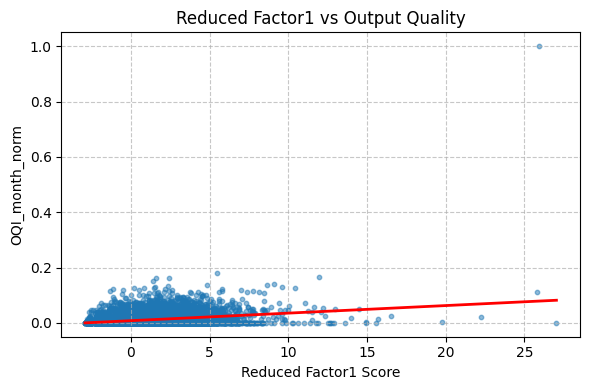

In [ ]:
# Cell 9: Compute and validate rotated factor scores from reduced EFA

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.linear_model import LinearRegression

# 1. Prepare reduced numeric matrix (drop low-KMO variable)
df_num2 = df_numeric.drop(columns=['europeanOrganizationRatio'])

# 2. Fit a two-factor model on reduced data
fa2 = FactorAnalysis(n_components=2, random_state=42)
fa2.fit(df_num2)
L2 = fa2.components_.T  # unrotated loadings

# 3. Varimax rotation function
def varimax(Phi, gamma=1.0, q=20, tol=1e-6):
    p, k = Phi.shape
    R = np.eye(k)
    d = 0
    for _ in range(q):
        Lambda = Phi @ R
        u, s, vh = np.linalg.svd(
            Phi.T @ (Lambda**3 - (gamma/p) * Lambda @ np.diag(np.diag(Lambda.T @ Lambda)))
        )
        R = u @ vh
        d_new = s.sum()
        if d != 0 and d_new/d < 1 + tol:
            break
        d = d_new
    return Phi @ R

# 4. Rotate loadings and compute factor scores
L2_rot = varimax(L2)
F2_scores = df_num2.values @ L2_rot
df['Factor1_new'] = F2_scores[:, 0]
df['Factor2_new'] = F2_scores[:, 1]

# 5. Correlations with actual output
corr1_new = df['Factor1_new'].corr(df['OQI_month_norm'])
corr2_new = df['Factor2_new'].corr(df['OQI_month_norm'])
print(f"New Factor1 vs OQI correlation: {corr1_new:.3f}")
print(f"New Factor2 vs OQI correlation: {corr2_new:.3f}")

# 6. Regression R²
X_new = df[['Factor1_new', 'Factor2_new']]
y = df['OQI_month_norm']
r2_new = LinearRegression().fit(X_new, y).score(X_new, y)
print(f"Regression R² with new factors: {r2_new:.3f}")

# 7. Plot new Factor1 vs OQI
plt.figure(figsize=(6,4))
plt.scatter(df['Factor1_new'], y, s=10, alpha=0.5)
x_vals = np.linspace(df['Factor1_new'].min(), df['Factor1_new'].max(), 100)
coef, intercept = LinearRegression().fit(X_new, y).coef_[0], LinearRegression().fit(X_new, y).intercept_
plt.plot(x_vals, intercept + coef * x_vals, 'r-', linewidth=2)
plt.xlabel('Reduced Factor1 Score')
plt.ylabel('OQI_month_norm')
plt.title('Reduced Factor1 vs Output Quality')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
